## Data Wrangling

In [ ]:
import pandas as pd

In [219]:
movies=pd.read_csv('Cleandata/Movies_revised.csv')

In [217]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
len(movies)

4803

In [19]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Parse out Json Objects 

In [179]:
import json
genre_list=[]

for i in range(4803):
    #print(i)
    genres=movies['genres'][i]
    genres = json.loads(genres)
    genre_list2=[]
    for genre in genres:
        #genre_list2=[]
        #print(genre)
        genre_list2.append(genre['name'])
    genre_list.append(genre_list2)

In [ ]:
genre_list

In [185]:
len(genre_list)

4803

In [188]:
genre_list[0][0]

'Action'

In [104]:
Genres=pd.DataFrame(genre_list)

In [107]:
unique_genres=Genres[0].unique()

In [117]:
columns =unique_genres

## Create Dummy Variables (One hot encoding)

In [118]:
columns

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [120]:
index=range(4803)

In [199]:
df_Genre_list= pd.DataFrame(index=index, columns=columns)

In [200]:
df_Genre_list=df_Genre_list.fillna(0)

In [147]:
len(df_Genre_list.columns)

20

In [194]:
df_Genre_list.loc[0,"Action"]=1

In [203]:
df_Genre_list.head()


,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [202]:
for row in range(len(df_Genre_list)):
    for col in genre_list[row]:
        df_Genre_list.loc[row,col]=1
    

In [206]:
genre_list[3]

['Action', 'Crime', 'Drama', 'Thriller']

In [208]:
df_Genre_list=df_Genre_list.add_suffix('_genre')

In [213]:
movies=pd.concat([movies,df_Genre_list],axis=1)

In [214]:
movies.to_csv('Movies_revised.csv', index=None)

In [226]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Action_genre', 'Adventure_genre', 'Fantasy_genre',
       'Science Fiction_genre', 'Crime_genre', 'Drama_genre', 'Thriller_genre',
       'Animation_genre', 'Family_genre', 'Western_genre', 'Comedy_genre',
       'Romance_genre', 'Horror_genre', 'Mystery_genre', 'History_genre',
       'War_genre', 'Music_genre', 'Documentary_genre', 'Foreign_genre',
       'TV Movie_genre'],
      dtype='object')

In [47]:
movies_nozerro=movies[movies['revenue']!=0]

In [271]:
release=movies['release_date']

In [280]:
type(release[4802])

str

In [257]:
test=str(release)

In [285]:
month=[]
for i in release:
    
    try:
        a=i[5:7]
        month.append(a)
        
    except:
        month.append("")
    

In [288]:
Month=pd.DataFrame(month)

In [290]:
Month=Month.replace('12','Dec')
Month=Month.replace('11','Nov')
Month=Month.replace('10','Oct')
Month=Month.replace('09','Sep')
Month=Month.replace('08','Aug')
Month=Month.replace('07','Jul')
Month=Month.replace('06','Jun')
Month=Month.replace('05','May')
Month=Month.replace('04','Apr')
Month=Month.replace('03','Mar')
Month=Month.replace('02','Feb')
Month=Month.replace('01','Jan')

In [294]:
Mon_list=Month[0].unique()

In [295]:
index=range(4803)

In [376]:
df=pd.DataFrame(index=index,columns=Mon_list)

In [377]:
df=df.fillna(0)

In [355]:
df.head()

,Dec,May,Oct,Jul,Mar,Nov,Apr,Jun,Feb,Aug,Sep,Jan
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [378]:
Mon_list=Mon_list[0:12]
df.loc[0,'Dec']=1

In [380]:
for row in range(len(df)):
    #print(Month[0][row])
    
    if Month[0][row]!='':
        df.loc[row,Month[0][row]]=1

In [382]:
df=df.add_suffix('_releaseMon')

In [384]:
movies=pd.concat([movies,df],axis=1)

In [387]:
movies.to_csv('Movies_revised.csv', index=None)

In [388]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Action_genre', 'Adventure_genre', 'Fantasy_genre',
       'Science Fiction_genre', 'Crime_genre', 'Drama_genre', 'Thriller_genre',
       'Animation_genre', 'Family_genre', 'Western_genre', 'Comedy_genre',
       'Romance_genre', 'Horror_genre', 'Mystery_genre', 'History_genre',
       'War_genre', 'Music_genre', 'Documentary_genre', 'Foreign_genre',
       'TV Movie_genre', 'Dec_releaseMon', 'May_releaseMon', 'Oct_releaseMon',
       'Jul_releaseMon', 'Mar_releaseMon', 'Nov_releaseMon', 'Apr_releaseMon',
       'Jun_releaseMon', 'Feb_releaseMon', 'Aug_releaseMon', 'Sep_releaseMon',
       'Jan_releaseMon'],
      dtype='object')

In [1]:
import pandas as pd
movies=pd.read_csv('Movies_revised.csv')

In [2]:
movies_model=movies[['id','budget','popularity', 'runtime','vote_average',
       'vote_count', 'Action_genre', 'Adventure_genre', 'Fantasy_genre',
       'Science Fiction_genre', 'Crime_genre', 'Drama_genre', 'Thriller_genre',
       'Animation_genre', 'Family_genre', 'Western_genre', 'Comedy_genre',
       'Romance_genre', 'Horror_genre', 'Mystery_genre', 'History_genre',
       'War_genre', 'Music_genre', 'Documentary_genre', 'Foreign_genre',
       'TV Movie_genre', 'Dec_releaseMon', 'May_releaseMon', 'Oct_releaseMon',
       'Jul_releaseMon', 'Mar_releaseMon', 'Nov_releaseMon', 'Apr_releaseMon',
       'Jun_releaseMon', 'Feb_releaseMon', 'Aug_releaseMon', 'Sep_releaseMon',
       'Jan_releaseMon','revenue']]

## Saving data for visualization 

In [413]:
movies_model.to_csv('movie_visualization.csv')

## Building Model

In [81]:
import pandas as pd 
movies=pd.read_csv('movie_visualization.csv')

In [136]:
movies.describe()

,Unnamed: 0,id,budget,popularity,runtime,vote_average,vote_count,Action_genre,Adventure_genre,Fantasy_genre,...,Jul_releaseMon,Mar_releaseMon,Nov_releaseMon,Apr_releaseMon,Jun_releaseMon,Feb_releaseMon,Aug_releaseMon,Sep_releaseMon,Jan_releaseMon,revenue
count,4803.000000,4803.000000,4.803000e+03,4803.000000,4801.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,...,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4.803000e+03
mean,2401.000000,57165.484281,2.904504e+07,21.492301,106.875859,6.092172,690.217989,0.240267,0.164481,0.088278,...,0.075578,0.077452,0.067874,0.072871,0.080991,0.067874,0.085988,0.122423,0.079534,8.226064e+07
std,1386.651002,88694.614033,4.072239e+07,31.816650,22.611935,1.194612,1234.585891,0.427290,0.370750,0.283729,...,0.264349,0.267334,0.251556,0.259952,0.272850,0.251556,0.280375,0.327808,0.270598,1.628571e+08
min,0.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1200.500000,9014.500000,7.900000e+05,4.668070,94.000000,5.600000,54.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2401.000000,14629.000000,1.500000e+07,12.921594,103.000000,6.200000,235.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.917000e+07
75%,3601.500000,58610.500000,4.000000e+07,28.313505,118.000000,6.800000,737.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.291719e+07
max,4802.000000,459488.000000,3.800000e+08,875.581305,338.000000,10.000000,13752.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.787965e+09


## Filter out Revenue 0 records

In [82]:
movies_nozerro=movies[movies['revenue']!=0]

In [83]:
movies_nozerro['revenue'].describe().astype(int)

count          3376
mean      117031352
std       183483090
min               5
25%        15352895
50%        51751835
75%       140165095
max      2787965087
Name: revenue, dtype: int64

In [84]:
#Mean 11,7031,352
list_a=[]
for i in movies_nozerro['revenue']:
    if i>=117031352:
        a=1
    else:
        a=0
    list_a.append(a)

In [ ]:
movies_nozerro=movies_nozerro.reset_index()
del movies_nozerro['Unnamed: 0']
del movies_nozerro['id']

In [92]:
movies_nozerro['target']=list_a

In [93]:
del movies_nozerro['index']

In [94]:
movies_nozerro.head()

,budget,popularity,runtime,vote_average,vote_count,Action_genre,Adventure_genre,Fantasy_genre,Science Fiction_genre,Crime_genre,...,Mar_releaseMon,Nov_releaseMon,Apr_releaseMon,Jun_releaseMon,Feb_releaseMon,Aug_releaseMon,Sep_releaseMon,Jan_releaseMon,revenue,target
0,237000000,150.437577,162.0,7.2,11800,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2787965087,1
1,300000000,139.082615,169.0,6.9,4500,1,1,1,0,0,...,0,0,0,0,0,0,0,0,961000000,1
2,245000000,107.376788,148.0,6.3,4466,1,1,0,0,1,...,0,0,0,0,0,0,0,0,880674609,1
3,250000000,112.312950,165.0,7.6,9106,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1084939099,1
4,260000000,43.926995,132.0,6.1,2124,1,1,0,1,0,...,1,0,0,0,0,0,0,0,284139100,1


In [95]:
#movies
#Getting X
df=movies_nozerro.iloc[:,:-2]
#del df['Unnamed: 0']
movies_nozerro.head()

,budget,popularity,runtime,vote_average,vote_count,Action_genre,Adventure_genre,Fantasy_genre,Science Fiction_genre,Crime_genre,...,Mar_releaseMon,Nov_releaseMon,Apr_releaseMon,Jun_releaseMon,Feb_releaseMon,Aug_releaseMon,Sep_releaseMon,Jan_releaseMon,revenue,target
0,237000000,150.437577,162.0,7.2,11800,1,1,1,1,0,...,0,0,0,0,0,0,0,0,2787965087,1
1,300000000,139.082615,169.0,6.9,4500,1,1,1,0,0,...,0,0,0,0,0,0,0,0,961000000,1
2,245000000,107.376788,148.0,6.3,4466,1,1,0,0,1,...,0,0,0,0,0,0,0,0,880674609,1
3,250000000,112.312950,165.0,7.6,9106,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1084939099,1
4,260000000,43.926995,132.0,6.1,2124,1,1,0,1,0,...,1,0,0,0,0,0,0,0,284139100,1


In [96]:
df.head()

,budget,popularity,runtime,vote_average,vote_count,Action_genre,Adventure_genre,Fantasy_genre,Science Fiction_genre,Crime_genre,...,Oct_releaseMon,Jul_releaseMon,Mar_releaseMon,Nov_releaseMon,Apr_releaseMon,Jun_releaseMon,Feb_releaseMon,Aug_releaseMon,Sep_releaseMon,Jan_releaseMon
0,237000000,150.437577,162.0,7.2,11800,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,300000000,139.082615,169.0,6.9,4500,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,107.376788,148.0,6.3,4466,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,250000000,112.312950,165.0,7.6,9106,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,260000000,43.926995,132.0,6.1,2124,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


## Split Dataset into Train and Test sets

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, movies_nozerro["target"], test_size=0.30, random_state=42)

## Feature Selection

In [99]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(x_train,y_train )
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False False False False False
 False  True  True False False False False False False False False False
 False False False  True False  True False  True False  True  True  True
  True]
[25 21 23  5 24  2  1  6 18 11  4 17 26  1  1 19 15  7 12  9 22 10  3 27
 28  8 16  1 20  1 14  1 13  1  1  1  1]


## Create dataset with selected features

In [100]:
# x_train_filter=x_train[['Adventure_genre','Family_genre','Western_genre','Oct_releaseMon','Mar_releaseMon','Apr_releaseMon',
# 'Feb_releaseMon', 'Aug_releaseMon', 'Sep_releaseMon','Jan_releaseMon']]

x_train_f=x_train[[ 'popularity', 'Crime_genre', 'vote_count',
       'Western_genre', 'Adventure_genre', 
       'Science Fiction_genre','Dec_releaseMon',
       'May_releaseMon', 'Oct_releaseMon',
       'Jul_releaseMon', 'Mar_releaseMon', 'Nov_releaseMon', 'Apr_releaseMon',
       'Jun_releaseMon', 'Feb_releaseMon', 'Aug_releaseMon', 'Sep_releaseMon',
       'Jan_releaseMon']]

X_test=x_test[[ 'popularity', 'Crime_genre', 'vote_count',
       'Western_genre', 'Adventure_genre', 
       'Science Fiction_genre','Dec_releaseMon',
       'May_releaseMon', 'Oct_releaseMon',
       'Jul_releaseMon', 'Mar_releaseMon', 'Nov_releaseMon', 'Apr_releaseMon',
       'Jun_releaseMon', 'Feb_releaseMon', 'Aug_releaseMon', 'Sep_releaseMon',
       'Jan_releaseMon']]

## Running Logistic Regression with selected variables

In [103]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train_f)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.376335
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 2363
Model:                          Logit   Df Residuals:                     2345
Method:                           MLE   Df Model:                           17
Date:                Sun, 29 Jul 2018   Pseudo R-squ.:                  0.3642
Time:                        16:10:43   Log-Likelihood:                -889.28
converged:                       True   LL-Null:                       -1398.6
                                        LLR p-value:                8.833e-206
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
popularity                0.0290      0.005      5.285      0.000       0.018       0.

All the variables used here have P values less than 0.05, meaning they are significant to the model. and the model explains about 36% of the data, which is not bad, so we will keep using these variables for prediction.

## Run Logit Regression to see the performance

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train_f, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Prediction

In [200]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


## Check Accuray using K-fold cross validation

In [201]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train_f, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.828


## Check Confusion Matrix

In [202]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[650  37]
 [155 171]]


## Check F1 Score

In [203]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.95      0.87       687
          1       0.82      0.52      0.64       326

avg / total       0.81      0.81      0.80      1013



## Plot out ROC/AUC curve

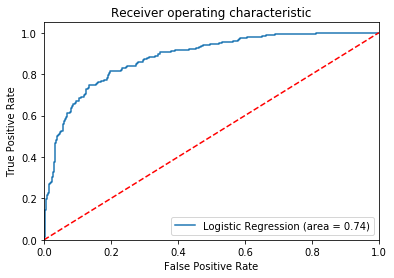

In [204]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Results for Logistic Regression
Logistic Regression has a ROC of 74% and F1 Score of F1, it is not a bad model, but I want to see if running an Ensemble model would increase the model performance 

## Ensembles, Load models and scores

In [1]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=0)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=0)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=0)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""


    print("Fitting models.")
    model_results = {}
    for i, (name, m) in enumerate(get_models().items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(x_train_f, y_train)
        model_results[name] = m.predict(X_test)
        print("done")
    
    #import pdb; pdb.set_trace()
    P = pd.DataFrame(model_results)
    print("Done.\n")
    
#     lr = LogisticRegression(C=100, random_state=0)
#     lr.fit(P,y_test)

#     ensemble=lr.predict(P)
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-1s: %.3f" %(m,score))
    print("Done.\n")


## Train models and get scores for model

In [144]:

P = train_predict(X_test.values)
score_models(P, y_test)

Fitting models.
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
Done.



## Dump the trained Ensemble model for web deployment

In [135]:
from sklearn.externals import joblib
joblib.dump(train_predict, 'ensemble_model.pkl')

['ensemble_model.pkl']

## Ensemble ROC/AUC Score

In [73]:
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(y_test, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.835


## Plot out ROC Curve

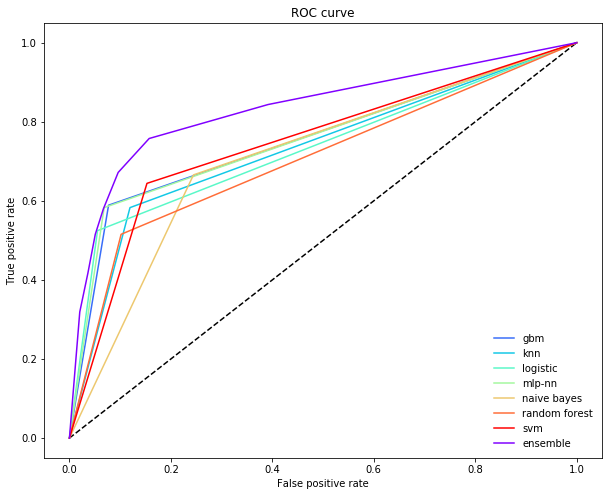

In [74]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
def plot_roc_curve(y_test, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(y_test, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.savefig('ROC_curve.png')


plot_roc_curve(y_test, P.values, P.mean(axis=1), list(P.columns), "ensemble")

## Build another Logistic Regression on top of All the models

In [76]:
lr = LogisticRegression(C=100, random_state=0)
lr.fit(P,y_test)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
ensemble=lr.predict(P)

## Models performance Check

GBM

In [56]:
from sklearn.metrics import classification_report
print("GBM")
print(classification_report(y_test, P.iloc[:,0]))

GBM
             precision    recall  f1-score   support

          0       0.83      0.92      0.87       687
          1       0.78      0.59      0.67       326

avg / total       0.81      0.82      0.81      1013



KNN

In [59]:
from sklearn.metrics import classification_report
print("GBM")
print(classification_report(y_test, P.iloc[:,1]))

GBM
             precision    recall  f1-score   support

          0       0.82      0.88      0.85       687
          1       0.70      0.58      0.64       326

avg / total       0.78      0.78      0.78      1013



Logit

In [60]:
from sklearn.metrics import classification_report
print("Logit")
print(classification_report(y_test, P.iloc[:,2]))

Logit
             precision    recall  f1-score   support

          0       0.81      0.94      0.87       687
          1       0.82      0.52      0.64       326

avg / total       0.81      0.81      0.80      1013



MLP NN

In [61]:
from sklearn.metrics import classification_report
print("MLP")
print(classification_report(y_test, P.iloc[:,3]))

MLP
             precision    recall  f1-score   support

          0       0.82      0.93      0.87       687
          1       0.80      0.58      0.67       326

avg / total       0.82      0.82      0.81      1013



Naive Bayes

In [62]:
from sklearn.metrics import classification_report
print("Naive bayes")
print(classification_report(y_test, P.iloc[:,4]))

Naive bayes
             precision    recall  f1-score   support

          0       0.83      0.76      0.79       687
          1       0.56      0.67      0.61       326

avg / total       0.74      0.73      0.73      1013



Random Forest

In [63]:
from sklearn.metrics import classification_report
print("Random Forest")
print(classification_report(y_test, P.iloc[:,5]))

Random Forest
             precision    recall  f1-score   support

          0       0.80      0.90      0.84       687
          1       0.71      0.52      0.60       326

avg / total       0.77      0.77      0.76      1013



SVM

In [64]:
from sklearn.metrics import classification_report
print("SVM")
print(classification_report(y_test, P.iloc[:,6]))

SVM
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       687
          1       0.67      0.64      0.66       326

avg / total       0.78      0.78      0.78      1013



Ensmeble

In [80]:
from sklearn.metrics import classification_report
print("ensemble")
print(classification_report(y_test, ensemble))

ensemble
             precision    recall  f1-score   support

          0       0.83      0.92      0.88       687
          1       0.79      0.61      0.69       326

avg / total       0.82      0.82      0.82      1013



## Result for Ensmble 
There is an overall increase of model performance when using Ensemble instead of all models that were used, 
Ensemble model has the highest F1 score as well as the higest ROC, so we will use Ensemble for the profitability prediction.